# Introduction to Scikit-Learn(sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikt-Learn library.

It will cover: 


In [1]:
# Listifying the contents
what_weare_covering = [
"0. An end-to-end Scikit-learn wotkflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together."]

In [2]:
what_weare_covering

['0. An end-to-end Scikit-learn wotkflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together.']

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [4]:
# 1. Getting the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


We will use all the columns across to try and predict the target 1, or 0 ie, heart disease or not.
We thus need an x and Y where its normally the target.

In [5]:
#Create x (Features metrix/data/feature variables)
x = heart_disease.drop("target", axis=1)

#Create Y(labels)
y = heart_disease["target"]

In choosing which model/algorithm/estimator, we first define our problem.
In this case it is a classification problem, why it classifies whether someone has heart disease or not.
Hyperparameters are like dials in a model that you can tune to make it better or worse. 
We choose RandomForest.  

In [6]:
# How to deal with arnings:
# 1. You can do as it says or ignore:
import warnings
warnings.filterwarnings("default")
# We pass "ignore" if you dont want to deal with the warnings
# "default" shows the warnings still.

In [7]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
    
#We'll keep the default  
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

RandomForestClassifier is a classification ml model capable of learning patterns in data and then classifies whether a sample aka a row is one thing or another thing. We then intantiate that class using clf(classifier in scikitlearn) or model.(another name for clf).
To see what parameters the model is using you can use clf.get_params().

In [8]:
# 3. Fit the model to the training data.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Training the model on training set and test it on test set. We create them.
Splitting the data into train and test we use the sklearn train_test_split.
This splits data from x and y into x_train, y_train, training data and x_test, y_test testing data.
We fit the model to training data and then evaluate it see what it haas planned on test data, data it has never seen before.
Test size 0.2 ie 80% of data will be used for training and 20% for testing.
E.g if we have 1000 rows, 800 would be used for training and 200 for testing.

In [9]:
#To fit the data
clf.fit(x_train, y_train);

This simply says, classification model randomforest find the patterns in the training data.

In [10]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2


In [11]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3


In [12]:
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
y_test

299    0
16     1
276    0
273    0
135    1
      ..
283    0
70     1
245    0
24     1
108    1
Name: target, Length: 61, dtype: int64

In [14]:
import warnings
warnings.filterwarnings("default")

In [15]:
# Making a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

C:\Users\useer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# 4. Evaluate the model
clf.score(x_train, y_train)

clf.score returns the mean accuracy on the given test data and labels.

In [ ]:
clf.score(x_test, y_test)

In [ ]:
#Other metrics we czn use other than accuacy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

Shows some classification metrics that can pair the test labels to the prediction labels we made up using the predict function.
Using the same we can do a confusion matrix.

In [16]:
confusion_matrix(y_test, y_preds)

NameError: name 'confusion_matrix' is not defined

In [17]:
accuracy_score(y_test, y_preds)

NameError: name 'accuracy_score' is not defined

In [18]:
# 5. Improve the mode
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")      

Trying model with 10 estimators...
Model accuracy on test set: 78.69%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 86.89%

Trying model with 50 estimators...
Model accuracy on test set: 86.89%

Trying model with 60 estimators...
Model accuracy on test set: 78.69%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 80.33%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [19]:
# 6. Save the model and load it
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

C:\Users\useer\AppData\Local\Temp\ipykernel_6600\1258861031.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))


In [20]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

C:\Users\useer\AppData\Local\Temp\ipykernel_6600\1321266746.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))


0.8032786885245902

rb means read binary.


## 1. Getting data ready to be used with machine learning

Three main things:

     1. Split the data into features and labels (usually 'x' & 'y')
     2. Filling (also called imputing) or disregaarding missing values
     3. Converting non-numerical values to numerical values(also called feature encoding)

In [21]:
#Viewing the first five rows of our data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# NB axis=1 is the column while axis=0 is the row
#After dropping x now will be every single column except the target. 
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
#Y will be the target column coz they are the labels of our ml problem.
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Splitting data to train and test test because one of the ml fundamentals of ml is:
# Never evaluate/test your models on data it has learned from.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

from sklearn.model_selection import train_test_split  it returns 4 different values. 

In [25]:
#Cheking the shapes of our new matrices
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

But where is 242 coming from? Lets do some maths:

In [26]:
# We see the initial shape of x before splitting
x.shape[0] 

303

In [27]:
#Length of our data
len(heart_disease)

303

In [28]:
#The training data should be 0.8 of the entire data
x.shape[0] * 0.8

242.4

In [29]:
#Testing data should be 0.2 20% of entire data
x.shape[0] * 0.2 

60.6

In [30]:
# Adding up the size of train and test data to add up to the entire data.
242 + 61

303

### 1.1 Make sure all data is numerical

In [31]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [32]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [33]:
len(car_sales)

1000

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
# Split the data into x/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [36]:
# Building ml model
from sklearn.ensemble import RandomForestRegressor
#RandomForestRegressor is same as a ClassifierRandomForest but this time it can predict a number since we are predicing the prices of cars.

#Importing a regression model.
model = RandomForestRegressor()
#Training it on the training data
model.fit(x_train, y_train)
#Evaluate it/score it on the test data.
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

This is it, our ml model can't deal with strings, we have to convert everything into numbers.
Lets do it as follows with sklearn.

In [37]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [38]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Categoical features that we are to turn to numerical
categorical_features = ["Make", "Colour", "Doors"]
#Create a variable one_hot that instantiate the OneHotEncoder class
one_hot = OneHotEncoder()
#Make a variable transformer that uses the ColumnTransformer  to accept a list of tuples.
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

# variable transformed_x will be the version of our x data except converted into numbers.
transformed_x =  transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [39]:
# Putting it into a dataframe that makes sense
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


Because we have told scikitlearn to make the columns Make, Colour and Doors column categories,
the code has transformed it ie it has one-hot-encoded it, the columns have been converted into one-hot-encoded variables 
but not the Odometer because the columns Make, Colour and have been defined in the categorical_features, 
we instantiated  the one_hot_encoder and then created a transformer using the ColumnTransformer, it tells the transformer to take 
the one-hot-coder and apply it to the categorical features, and for the reminder of the columns, it should passthrough
dont do anything to those.
Then we have created a transformed_x and fit our transformer to our x data.


In [40]:
# Option 2
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


It has turned the Make and Colour into 0s and 1s.
Now that the data is all in 0s and 1 we now refit the model

In [41]:
# Refitting the model
np.random.seed(42)
x_train,x_test,y_train, y_test = train_test_split(transformed_x,
                                                  y,
                                                  test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [42]:
# We now evaluate it
model.score(x_test, y_test)

0.3235867221569877

### 1.2 Dealing with missing data

Two main ways:
    
    * Fill them with some value(also known as imputation).
    * Remove the samples with missing data altogether.

In [43]:
# Import car-sales-missing data.
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
# Checking how much data we are missing in each column.
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Create x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [46]:
# Converting our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Categoical features that we are to turn to numerical
categorical_features = ["Make", "Colour", "Doors"]
#Create a variable one_hot that instantiate the OneHotEncoder class
one_hot = OneHotEncoder()
#Make a variable transformer that uses the ColumnTransformer  to accept a list of tuples.
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

# variable transformed_x will be the version of our x data except converted into numbers.
transformed_x =  transformer.fit_transform(car_sales_missing)
transformed_x

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [47]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [48]:
#Check how many doors a random car has
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Option 1: Fill missing data with Pandas

In [49]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna("missing", inplace=True)

# Fill the "Door" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [50]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

We didn't fill the Price column coz it is what we are predicting.
We then remove the rows with missing values in the price column.

In [51]:
# Removing the rows with missing PRice value
car_sales_missing.dropna(inplace=True)

In [52]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [53]:
# After removing the rows we loose some data
# To check the length of the new data
len(car_sales_missing)

950

In [54]:
x = car_sales_missing.drop("Price", axis=True)
y = car_sales_missing["Price"]

In [55]:
# Try and convert our data to numbers.
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Categoical features that we are to turn to numerical
categorical_features = ["Make", "Colour", "Doors"]
#Create a variable one_hot that instantiate the OneHotEncoder class
one_hot = OneHotEncoder()
#Make a variable transformer that uses the ColumnTransformer  to accept a list of tuples.
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
# variable transformed_x will be the version of our x data except converted into numbers.
transformed_x =  transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### Option 2: Filling missing values with scikitlearn

In [56]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [57]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
#Splitting data into a subset-get rid of rows witout price value & then split into x & y
#Drop the NaN values in the subset of price columns and remove them from the DF.
car_sales_missing.dropna(subset=["Price"], inplace=True)
#Re calculating how many missing values we have.
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
# Split into x & y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [60]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [61]:
# Fillig missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

We have imported two classes from scikitlearn: SimpleImputer and ColumnTransformer.
We have then defined some imputers. Imputers are just filling missing data using the SimpleImputer class which takes strategy and a fill value. If the strategy is constant we have to pass it a fill value. Saying, go to the categorical columns, constantly fil them if you find  a missing value, just fill them with missing. Same to door column,keep the stategy constant, for every missing cell do the same thing and fill it wit 4. For the numerical column, ie Odometer Column fill it with the mean.
The we defined which columns are which, categorical columns are Make & Colour. Door features and numerical features are the Odometer.
Then we have used the ColumnTransformer class to create an imputer passsing it the imputations/transformations we wanted to do. The ColumnTransformer takes a list of multiple different transformers. We have a list and wihin it a tuples of the name, the imputer we want to use and other features we want the specific imputer to change. Cat_imputer will use thecat_imputer on categorical features, door_imputer on door_features and the numerical imputer on the numerical features.
After defining our transformer, we upload filled_x coz we are going to use our imputer and fit transform on our x data to fill up the values of x.

In [62]:
# We create another df, and pass it filled x and columns names of our pevious columns.
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [63]:
#Checking for missing values
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [64]:
# Try and convert our data to numbers.
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Categoical features that we are to turn to numerical
categorical_features = ["Make", "Colour", "Doors"]
#Create a variable one_hot that instantiate the OneHotEncoder class
one_hot = OneHotEncoder()
#Make a variable transformer that uses the ColumnTransformer  to accept a list of tuples.
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
# variable transformed_x will be the version of our x data except converted into numbers.
transformed_x =  transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [65]:
# We have our data as numbers and filled(no missing values)
# Fitting a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

It has performed worse because it only has 950 samples

In [66]:
len(car_sales_filled), len(car_sales)

(950, 1000)

Filling missing values is called imputation while turning non-numerical values into numerical values is called feature engineering/feature encoding.

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning or algorithm.

* Classification - predicting whether a sample is one thing or another
* Regression - Predicting a number.

 ### 2.1 Picking a ml model for a regression model

In [67]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

C:\Users\useer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [68]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [69]:
# How many sample
len(boston_df)

506

In [70]:
# Trying the Ridge Regression model
from sklearn.linear_model import Ridge

# Set up random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the Ridge model on test data
model.score(x_test, y_test)

0.6662221670168522

To improve the score

In [71]:
# We try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
x_train, x_test, y_train, t_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(x_test, y_test)

0.8654448653350507

## 2.2 Choosing an estimator for a classification problem

In [72]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
len(heart_disease)

303

Consulting the map we try LinearSVC model

In [74]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

C:\Users\useer\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [75]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [76]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, t_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:
    
    1. If the data is structured use ensemble methods.
    2. If it's unstructured data, use deep learning or transfer learning

In [77]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions.

### 3.1 Fitting the model to the data.


Different names for
* x = features, features variables, data
* y = labels, targets, target variables

In [78]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, t_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data(training the ml model)
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

Fit:
When we pass x & y to fit will cause the model to go through all the exaples in x(traininng data) and see what the corresponding y is, and tries to cofigure out the patterns(different combination of numbers) that leads to having 1/0 as a label.
How a ml model does this is going to be different from the model used.
During training, the model finds patterns and during testing it uses the patterns it has learned.

In [79]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [80]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

There are 2 ways to make a prediction:
1. predict() function
2. predict_proba()

In [81]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # This doesnt work...

C:\Users\useer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [82]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [83]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
# Compare predictions to truth labels to evaluate the model
# y is also referred to as ground truths
# Making prediction with our models
y_preds = clf.predict(x_test)
# Calculating the accuracy/comparing how well the model did with the np mean
np.mean(y_preds == y_test)

0.8524590163934426

In [86]:

# Returns the mean accuracy on the given test data and labels
clf.score(x_test, y_test)

0.8524590163934426

In [87]:
# Another method-Accuracy classification score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()

In [88]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [89]:
# Predicting ie predict() on the same data
# Returns the probability of the label/class(no disease/heart disease) being true.
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [90]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [91]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [92]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [93]:
# Using predict() with a regression model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [94]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [95]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [96]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

Mean_absolute_error: Goes through each and every prediction(y_preds) and compares them to the test labels and figures out what the difference is or each sample and adds them all up and figures out the average.
2.1 means: on average, for every single prediction, we have trained the model that on average it predicts something that is 2.1 away from the target.

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn model/estimators
1. Estimator "score" method
2. The "Scoring" parameter
3. Problem-specific metric functions.

### 4.1 Evaluating a model with the score method

In [97]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

RandomForestClassifier()

In [98]:
clf.score(x_train, y_train)

1.0

In [99]:
clf.score(x_test, y_test)

0.8524590163934426

clf.score() in a classiication model, it returns the mean accuracy on the given test data and labels.
No model is perfect thus in the test score should can't get 100% and if so the ml model might be having errors in the data or in the way it's trained.
This case it's 85%.

Doing the same but with Regression

In [100]:
# Using predict() with a regression model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(x_train, y_train)

# Make predictions
y_preds = model.predict(x_test)

In [101]:
model.score(x_test, y_test)

0.8654448653350507

model.score(). The score method returns the coefficient of determination R^2 of the prediction.
The score function on every ml model has some kind of default evaluation metric built into it. 

### 4.2 Evaluating a model using the "scoring" parameter.

In [102]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train);

In [103]:
clf.score(x_test, y_test)

0.8524590163934426

In [104]:
cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [105]:
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [106]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# Compare the two 
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [107]:
# Default scoring parameter of classiier = mean accuracy
# clf.score()

In [108]:
# Scoring parameter set to None by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classiication report


**Accuracy**

In [109]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y, cv=5)

In [111]:
np.mean(cross_val_score)

0.8248087431693989

In [112]:
print(f"Heart Disease Classifier Cross_Validated_Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross_Validated_Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* A true positive = model predicts 1 when truth is 1
* A false positive = model predicts 1 when truth is 0   
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 whan truth is 1

In [113]:
# Creating x_test... etc
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [114]:
# Importing roc_curve from sklearn metrics
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [115]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [116]:
# Calclate fpr, tpr and threshholds
fpr, tpr, threshholds = roc_curve(y_test, y_probs_positive)

# Check the false positve rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

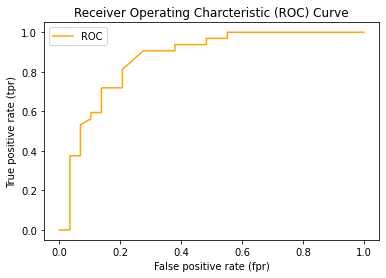

In [117]:
# Creating a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model.
    
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    # plt.plot([1, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customizing the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Charcteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)  
    

In [118]:
# auc(area under curve) score
from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

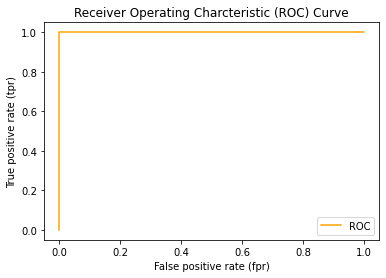

In [119]:
# Plot perfect ROC curve and AUC score
fpr, tpr, threshholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [120]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

A perfect ROC curve is very unlikely ie a perfect model that has no false positives or everything is true positive. 
A ROC curve compares the fpr vs tpr and it calculates the ROC curve of your model.

**Confusion Matrix**
    
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels its supposed to predict.

In essence, giving you an iddea of where the model is getting confused.

In [121]:
from sklearn.metrics import confusion_matrix

# Creating a confusion matrix by making some predictions.
y_preds = clf.predict(x_test)

# Passing the confusion matrix, the y_test(true labels) and predictions.
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

This is what all the evaluation metrics are doing: they are comparing the true labels with predictions and then giving us some insights.
Its easier to understand the matrix by visualizing it as done below:   
    

In [122]:
# Visualize confusion matrix with pd.crosstab()
# Crosstab compares two different things things: the true labels and predictions.
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In a confusion matrix anatomy, we read diagonally. The model get confused where the predicting label is 0 and the true label is 1 and viceversa.

In [123]:
23+6+6+26

61

In [124]:
|len(x_test)

SyntaxError: invalid syntax (4200345168.py, line 1)

In [125]:
# How to install a cond package into the current from a jupyter notebook.
# Installing seaborn using jupyter notebook
# sys gives us access to the system
# import sys 
# !conda install --yes --prefix {sys.prefix} seaborn

C:\Users\useer\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\useer\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\useer\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\useer\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\useer\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be remo

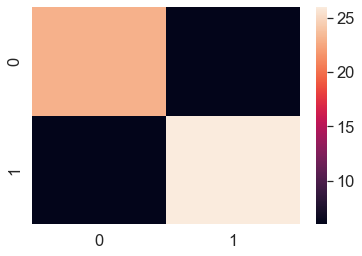

In [126]:
# Making the conusion matrix more visible
# Seaborn is plots rectangular data as  a color-encoded matrix.
# It is a visualization library built o top of matlpotlib.
import seaborn as sns 

# Set the ont scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

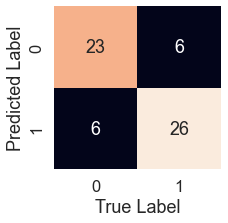

In [127]:
# Visualizing it more we add more info to it and functionize it.
def plot_conf_mat(conf_mat):
    """
    Plots a conusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annote the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(conf_mat)

C:\Users\useer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\useer\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:162: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(self.im_, ax=ax)


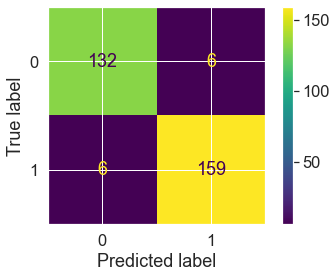

In [128]:
# We can also visualize using scikitlearn just like we have used pandas(pd) and seaborn(sns)
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x, y)

A confusion matrix shows us where the model gets confused.

**Classification Report**

A collection of different evaluation metrics rather than a single one.


In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [130]:
# Why other metrics come into play: ie why we dont use just one metrics
# Where precision and recall become valuable
# Creatig a numpy array of 10,000 people 
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

# Create a pd df to visualize where our model predicts everything as 0 and misses 1 positive.
pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\useer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\useer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\useer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


***To summarize classification metrics***
* ***Accuracy*** is a good measure to start with if all classes are balanced (eg. same amount of samples which are labelled with 0 or 1).
* ***Precision*** & ***recall*** become more important when classes are imbalanced.
* If falsepredictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* ***F1-score*** is a combination of precision and recall.



### 4.2.2 Regression model evaluation metrics

Three most common & used:

    1. R^2 or coeficient o determination
    2. Mean absolute error(MAE)
    3. Mean squared error(MSE)



**R^2**

It compares your model's predictions to the mean of the targets. Values can range from negative(a very poor model) to 1. E.g if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if it perfectly predicts a range of numbers it's R^2 value would be 1.

In [131]:

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train);

In [132]:
model.score(x_test, y_test)

0.8654448653350507

model.score() returns the coefficient of determination R^2 of the prediction.
In statistics, it is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [133]:
# Example-Another method to calculate R^2
from sklearn.metrics import r2_score

# Fill an array with y_test mean  
y_test_mean = np.full(len(y_test), y_test.mean())

In [134]:
y_test.mean()

21.488235294117654

In [135]:
# Comparing the true labels with the model's mean 
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [136]:
r2_score(y_test, y_test)

1.0

**Mean absolute error(MAE)**

It is the average of the absolute difference between predictions and actual values. It gives an idea of how wrong the model's predictions are.
To get the MAE, its the mean of the difference btwn predictions and actual values.

In [137]:
# Mean absolute error 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

This means on average every prediction our model makes is going to be on average + or - 2.13 away from the actual value. 

In [138]:
# Visualizing the MAE
df = pd.DataFrame(data={"actual values": y_test,
                         "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error (MSE)**

In [139]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

Higher than mae because it squares the errors rather than only taking the absolute difference into account.

In [140]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627439

### 4.3 Using different evaluation metriccs as Scikit-learn functions.

**Classification evaluation functions**

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make some predictions
y_preds = clf.predict(x_test)

# Evaluate the classifier
print("Classifier metrics on the test tst")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test tst
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [142]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = boston_df.drop("target", axis=1)
y = boston_df["target"]

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

# Making pedictions using our Regression model
y_preds = model.predict(x_test)

# Evaluate the Regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving a model

The first predictions are = baseline predictions.
First model = baseline model

To improve a model, there are two main ways:
1. From a data perspective:
   * Could we collect more data? (generally the more the data, the better).
   * Could we improve our data?
2. From a model perspective:
   * Is there a better model we could use?
   * Could we improve the current model?
* NB:Patterns in the data that a ml model finds is often reffered to as data parameters. Difference between parameters and hyper-paraneters is: 
* Parameters = the ml model find these parameters in data on its                      own.

* Hpyerparameters = settings on a model you can adjust to                                 (potentially) improve it's ability to find                            patterns.  


Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [143]:
# How do you find a model's hyperparameters?
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [144]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

This are all different hyperparameters that we can adjust on our random forest classifier.

### 5.1 Tuning hyperparameters by head

We make 3 sets: training, validation and test

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


We are going to try and adjust:
    
    * 'max_depth'
    * 'max_featuress'
    * 'min_samples-leaf'
    * 'min_samples_split'
    * 'n_estimators'

In [146]:
# Creating an evaluation function
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuarcy": round(accuracy, 2),
                   "precision": round(accuracy, 2),
                   "recall": round(accuracy, 2),
                   "f1": round(accuracy, 2),}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
          
    return metric_dict

In [147]:
# Splitting our heart disease data into train, validation and test
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Splitting the data into train, validation and test.
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[:valid_split]

len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

There's an imbalance of the validation & test data because we have used rounding off.

**Continuation of the above code:**

In [148]:
# Intantiating the model 
clf = RandomForestClassifier(n_estimators=10)

# Fitting our model to the train data
clf.fit(x_train, y_train)

# Make baseline predictions(evaluating baseline hyperparameters on validation test)
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 80.00%
Precision: 0.77
Recall: 0.92
F1 score: 0.84


In [149]:
# Adjusting our hyperparametrs
# Changing n_estimators from the baseline of 10-100
np.random.seed(42)

# Create a 2nd classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters on same data but diff model.
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [150]:
# Adjusting the max_depth from None to 10
#clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [151]:
from sklearn.model_selection import RandomizedSearchCV

# A grid is a dictionary with the hyperparameters to adjust as keys and values we would like to try as the values of the dict. 
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
# Implementing RandomizedSearchCV
np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Intantiate the RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

cv=5 means we are using a 5-fold-crossvaliadation
RandomizedSearchCV, takes the classifer and a param distribution grid and searches over the grid for 10 diff times(n_inter=10)models, different combinations of the parameters at random.
It automatically makes the validation test for us.

RandomizedSearchCV on hyperparameters implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function", "transform" and "inverse_transorm" if they are implemented in the estimator used.

In [152]:
# We call the best params on it, which combiantion got the best results.
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [153]:
# We call predict and by default it uses the above parameters
# Making predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds( y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81



No improvements, because you won't always find improvements maybe like we try like 50 different combination.
Using RandomizedSearchCV rather than running through all those settings by hand gives us to codify/functionize the tuning of hyperparameters.


### 5.3 Hyperparameter tuning with GridSearchCV

In [154]:
# Checking out our grid
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

Difference btwn a RandomizedSearchCV and GridSearchCV is that:

    * A RandomizedSearchCV has a parameter called n_inter which is set to limit the number of models to try, but a
    * GridSearchCV is like a brute force search ie it goes through every single combination available in the grid.
    
But this may take alot of computing power. But we can reduce the search space as shown:

In [155]:
# Reducing the number of hyperparameters it has to go through.
grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

Has been reduced to 60 vs 2700

In [156]:
# Using GridSearchCV to find the best hyperparametrs
from sklearn.model_selection import GridSearchCV, train_test_split

# Implementing GridSearchCV
np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Intantiate the RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

The GridSearchCV goes through all the diff hyperparametrs of grid_2, and pass them to the random_forest_classifier, trying each different combination. 

In [157]:
# We call the best params on it, which combiantion got the best results.
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [158]:
# We call predict and by default it uses the above parameters
# Making predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evaluate_preds( y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


**Comparing our different models metrics**

<AxesSubplot:>

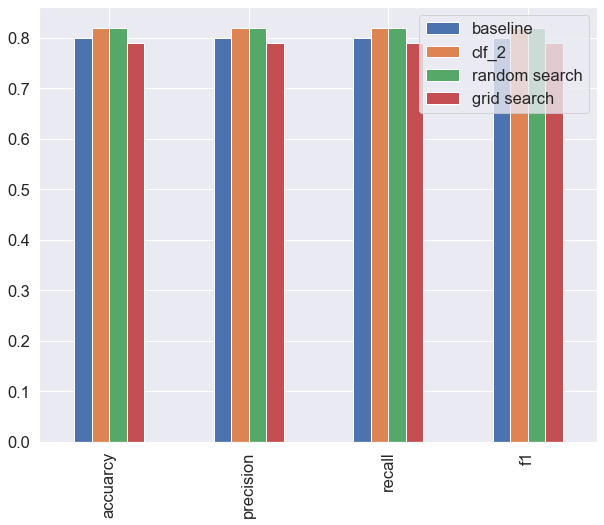

In [159]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

## 6. Saving and loading trained machine learning models.

There are 2 ways to save and load ml models:
1. With Python's 'pickle' module
2. With the 'joblib' module


**Pickle**

In [160]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))

C:\Users\useer\AppData\Local\Temp\ipykernel_6600\3419229514.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model_1.pk1'>
  pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))


The pickle module implements binary protocols for serializing and de-serializing a Pthon object structure ie Our model.
In the above code, we are exporting our gs_clf wich is our python object, to a pickle file.
We pass the parameter "wb", ie write binary because we are writing a file. 

In [161]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1", "rb"))

C:\Users\useer\AppData\Local\Temp\ipykernel_6600\2808770912.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_model_1.pk1'>
  loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1", "rb"))


Adv: Its stored in our directory thus it can be assessed without going thru the training steps we've done above, one can just access it and make predictions by loading it in.
Beacuse we are reading in a file, we pass in the parameter "rb" for read binary

In [162]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuarcy': 0.79, 'precision': 0.79, 'recall': 0.79, 'f1': 0.79}

**Joblib**

In [163]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [164]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [165]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuarcy': 0.79, 'precision': 0.79, 'recall': 0.79, 'f1': 0.79}

If the model is large, ie(carries large numpy arrays internally as is often the case for fitted scikit-learn estimators), it's more efficient to use joblib over pickle. In our case, our model is relatively small coz we are using 300 samples thus pickle is much suited.

## 7. Putting it all together!

In [166]:
# Using the pipeline class.
# Re-importing the data
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [167]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [168]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

The data has null values. We want to use Sci-kit learns pipeline to clean it. Its main input is steps, a list that contains a tuple which has step name and action to take.  

Steps we want to do:
 1. Fill missing data
 2. Convert data to numbers
 3. Build a model on the data

In [171]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use 'GridSearchCV' or 'RandomizedSearchCV' with our pipeline.

In [172]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [173]:
gs_model.score(x_test, y_test)

0.3339554263158365